In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [4]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris_dataset.DESCR.splitlines()

['Iris Plants Database',
 '====================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    petal width:    0.1  2.5   1.20  0.76 

In [6]:
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [7]:
df.shape

(150, 4)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
df['target'] = iris_dataset.target

In [10]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0,0.5,'target')

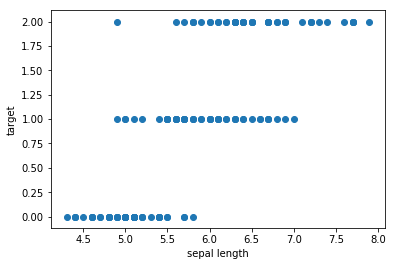

In [14]:
plt.scatter(df['sepal length (cm)'], df.target)
plt.xlabel('sepal length')
plt.ylabel('target')

Text(0,0.5,'target')

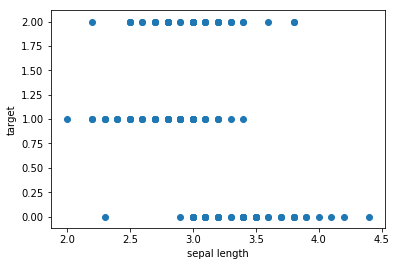

In [15]:
plt.scatter(df['sepal width (cm)'], df.target)
plt.xlabel('sepal length')
plt.ylabel('target')

Text(0,0.5,'target')

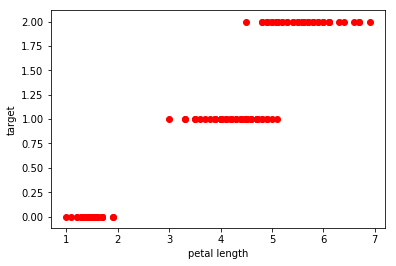

In [18]:
plt.scatter(df['petal length (cm)'], df.target, color='r')
plt.xlabel('petal length')
plt.ylabel('target')

Text(0,0.5,'target')

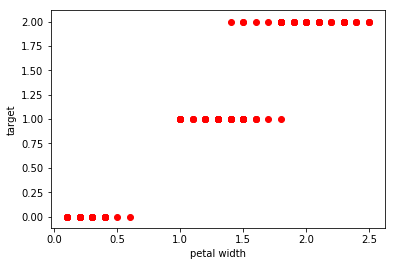

In [19]:
plt.scatter(df['petal width (cm)'], df.target, color='r')
plt.xlabel('petal width')
plt.ylabel('target')

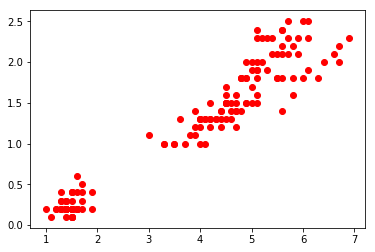

In [24]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='r')

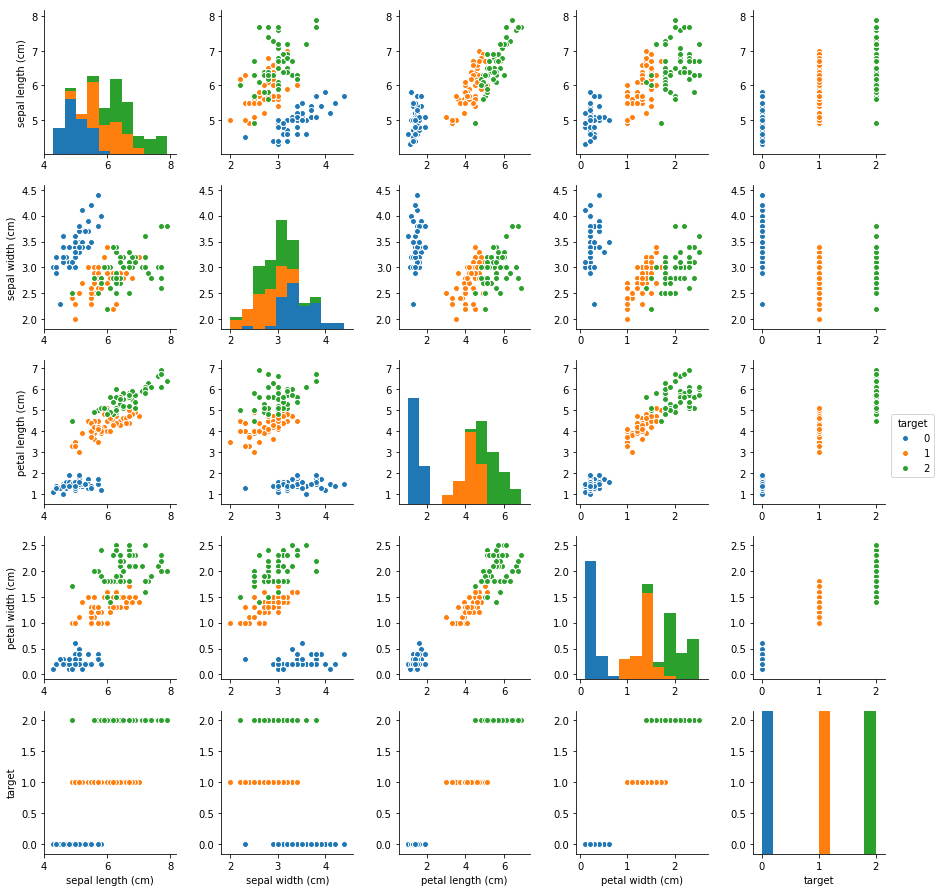

In [21]:
import seaborn as sns

sns.pairplot(df, hue='target')

In [20]:
# Kmeans algo

from sklearn.cluster import KMeans

In [25]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df.drop('target', axis='columns'))
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [26]:
df['cluster'] = y_predicted

In [35]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [29]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

In [30]:
df1.shape, df2.shape, df3.shape

((38, 6), (50, 6), (62, 6))

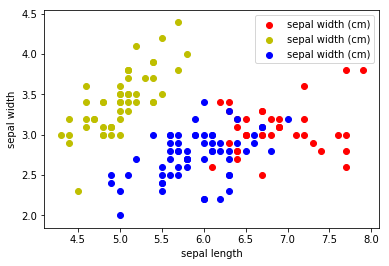

In [34]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='r')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='y')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='b')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

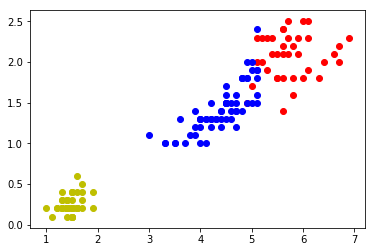

In [33]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='r')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='y')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='b')

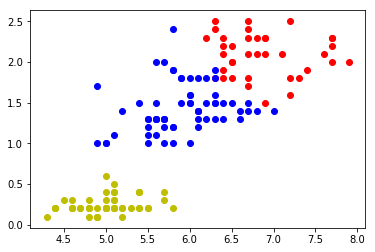

In [36]:
plt.scatter(df1['sepal length (cm)'], df1['petal width (cm)'], color='r')
plt.scatter(df2['sepal length (cm)'], df2['petal width (cm)'], color='y')
plt.scatter(df3['sepal length (cm)'], df3['petal width (cm)'], color='b')

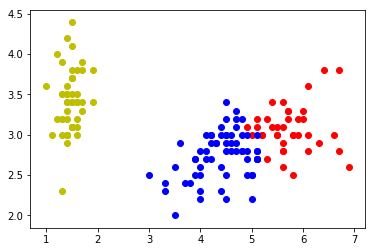

In [37]:
plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color='r')
plt.scatter(df2['petal length (cm)'], df2['sepal width (cm)'], color='y')
plt.scatter(df3['petal length (cm)'], df3['sepal width (cm)'], color='b')

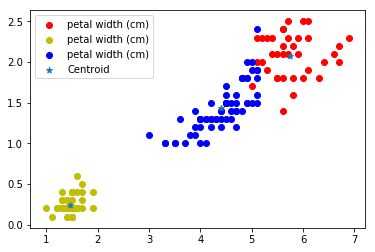

In [41]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='r')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='y')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='b')
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], marker='*', label='Centroid')
plt.legend()

## Elbow technique

In [46]:
# Elow technique to find out the best K value

sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df.drop(['target', 'cluster'], axis='columns'))
    sse.append(km.inertia_)

Text(0,0.5,'sse')

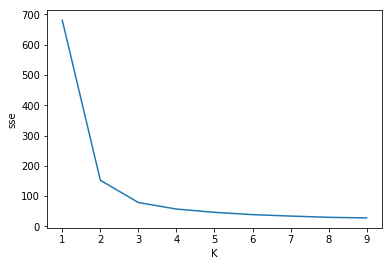

In [47]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('sse')